# Chapter 2: Working with Financial Data

Financial data analysis is a cornerstone of modern finance, informing critical decisions for investors, traders, analysts, and businesses alike. To effectively navigate the complex and dynamic financial landscape, professionals need robust tools and methodologies to extract meaningful insights from vast datasets.

In this chapter, we'll delve into the fundamentals of fetching, processing, and analyzing financial data, using Microsoft (MSFT) stock as a concrete example. By the end of this chapter, you'll have a solid grasp of how to leverage Python to:

* Efficiently retrieve historical stock price data.

* Cleanse and prepare data for analysis.

* Calculate key financial metrics and indicators.

* Visualize data trends to identify patterns and opportunities.

This knowledge will serve as a foundation for more advanced financial analysis techniques, empowering you to make data-driven decisions and gain a competitive edge in the financial world.

## 2.1 Introduction to Financial Data

We begin by setting up the Tiingo API and fetching historical price data for Microsoft (MSFT). This data will form the basis for our analysis throughout the chapter. 

In [1]:
from tiingo import TiingoClient
import os

# Set your Tiingo API key
os.environ['TIINGO_API_KEY'] = ''
client = TiingoClient()

In [2]:
# Fetching Microsoft stock data using TiingoClient

ticker = "MSFT"
historical_prices = client.get_ticker_price(
    ticker, 
    fmt='json',  # Specifies the format of the returned data as JSON (JavaScript Object Notation)
    startDate='2023-01-01', 
    endDate='2023-01-31', 
    frequency='daily'  # Specifies the frequency of the data (daily, weekly, etc.)
)

In [3]:
historical_prices[0:2]
# It selects the elements at indices 0 and 1 from the `historical_prices` list.
# Essentially, it returns a new list containing the first two elements of the original list.

[{'date': '2023-01-03T00:00:00.000Z',
  'close': 239.58,
  'high': 245.75,
  'low': 237.4,
  'open': 243.08,
  'volume': 25740036,
  'adjClose': 235.7251422422,
  'adjHigh': 241.7958665415,
  'adjLow': 233.5802185838,
  'adjOpen': 239.1688270149,
  'adjVolume': 25740036,
  'divCash': 0.0,
  'splitFactor': 1.0},
 {'date': '2023-01-04T00:00:00.000Z',
  'close': 229.1,
  'high': 232.87,
  'low': 225.96,
  'open': 232.275,
  'volume': 50623394,
  'adjClose': 225.4137661227,
  'adjHigh': 229.1231065779,
  'adjLow': 222.3242889266,
  'adjOpen': 228.5376801666,
  'adjVolume': 50623394,
  'divCash': 0.0,
  'splitFactor': 1.0}]

**The primary reason the data starts on January 3rd, 2023, and not January 1st or 2nd is due to the stock market's trading calendar.**

## 2.2 Processing the Data

Next, we extract and process the date and price information from the fetched data.

In [4]:
# Extracting date and price information

dates = [entry['date'] for entry in historical_prices]    
# Creating a list of dates from the historical prices data

In [5]:
dates

['2023-01-03T00:00:00.000Z',
 '2023-01-04T00:00:00.000Z',
 '2023-01-05T00:00:00.000Z',
 '2023-01-06T00:00:00.000Z',
 '2023-01-09T00:00:00.000Z',
 '2023-01-10T00:00:00.000Z',
 '2023-01-11T00:00:00.000Z',
 '2023-01-12T00:00:00.000Z',
 '2023-01-13T00:00:00.000Z',
 '2023-01-17T00:00:00.000Z',
 '2023-01-18T00:00:00.000Z',
 '2023-01-19T00:00:00.000Z',
 '2023-01-20T00:00:00.000Z',
 '2023-01-23T00:00:00.000Z',
 '2023-01-24T00:00:00.000Z',
 '2023-01-25T00:00:00.000Z',
 '2023-01-26T00:00:00.000Z',
 '2023-01-27T00:00:00.000Z',
 '2023-01-30T00:00:00.000Z',
 '2023-01-31T00:00:00.000Z']

In [6]:
# Creating a list of closing prices from the historical prices data

prices = [entry['close'] for entry in historical_prices] 

In [7]:
prices

[239.58,
 229.1,
 222.31,
 224.93,
 227.12,
 228.85,
 235.77,
 238.51,
 239.23,
 240.35,
 235.81,
 231.93,
 240.22,
 242.58,
 242.04,
 240.61,
 248.0,
 248.16,
 242.71,
 247.81]

## 2.3 Calculating the Average Price

We can calculate the average closing price for the specified period.

The len() function in Python returns the number of items in an object, such as elements in a list or characters in a string. Reminder: Use the help() function if needed.

In [8]:
# Calculating the average closing price by dividing the sum of prices by the number of prices
average_price = sum(prices) / len(prices)

In [9]:
# Calculating the average closing price by dividing the sum of prices by the number of prices
average_price = sum(prices) / len(prices)

The f typed before the string indicates the use of an f-string , a powerful way to format strings in Python (introduced in Python version 3.6). The f tells the Python interpreter that the string is an f-string. Inside the curly braces {}, you can include expressions that will be evaluated and converted to strings. In this case, the expression {ticker} is evaluated, and its value is inserted into the string.

In [10]:
# Printing the average closing price formatted to two decimal places
print(f"The average closing price for {ticker} in January 2023 is ${average_price:.2f}")

The average closing price for MSFT in January 2023 is $237.28


## 2.4 Visualization of the Data

Visualization helps in understanding data trends and patterns. We will use Matplotlib to plot the closing prices.

The following code snippet uses list comprehension to convert each string in the dates list into a datetime object, representing only the date piece. Below is a breakdown of its key components:

- `for date in dates`: Iterates through each string in the dates list.

- `date.split('T')[0]`: Splits the current string (date) at the letter 'T' and takes the first part (the date part). For example, '2023-01-03T00:00:00.000Z' becomes '2023-01-03'.

- `datetime.datetime.strptime(..., '%Y-%m-%d')`: Converts the extracted date string into a datetime object.


In [11]:
# Converting string dates to datetime objects

import matplotlib.pyplot as plt
import datetime

# Converting the date strings to datetime objects for better handling in the plot (reference above list for greater detail)
dates = [datetime.datetime.strptime(date.split('T')[0], '%Y-%m-%d') for date in dates]


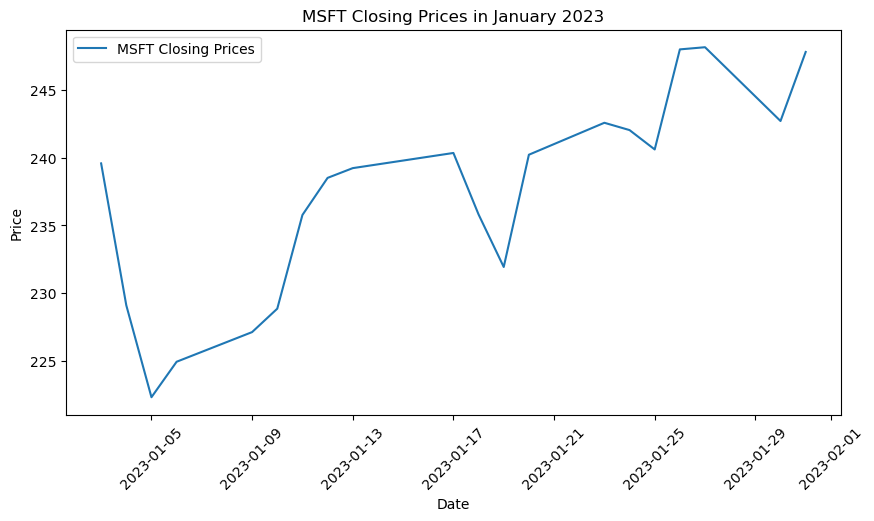

In [12]:
# Plotting the closing prices

# Setting the figure size for the plot
plt.figure(figsize=(10, 5))

# Plotting the dates on the x-axis and prices on the y-axis, with a label for the line
plt.plot(dates, prices, label=f'{ticker} Closing Prices')

# Labeling the x-axis as 'Date'
plt.xlabel('Date')

# Labeling the y-axis as 'Price'
plt.ylabel('Price')

# Setting the title of the plot
plt.title(f'{ticker} Closing Prices in January 2023')

# Displaying the legend for the plot
plt.legend()

# Rotating the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

## 2.5 Frequency Distribution

We can plot the frequency distribution of the closing prices to understand their distribution.

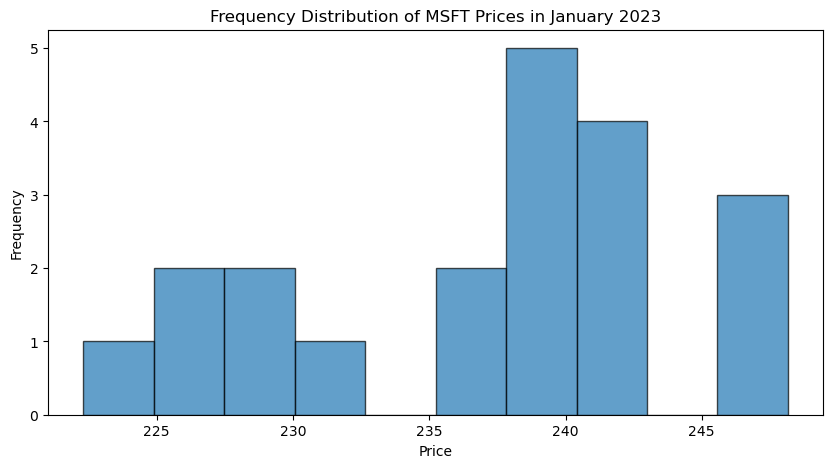

In [13]:
# Setting the figure size for the plot
plt.figure(figsize=(10, 5))

# Creating a histogram with 10 bins, black edges for the bins, and 70% transparency for the bars
plt.hist(prices, bins=10, edgecolor='k', alpha=0.7)

# Setting the title of the histogram
plt.title(f'Frequency Distribution of {ticker} Prices in January 2023')

# Labeling the x-axis as 'Price'
plt.xlabel('Price')

# Labeling the y-axis as 'Frequency'
plt.ylabel('Frequency')

# Displaying the histogram
plt.show()


## 2.6 Calculation of Log Returns

Log returns are a fundamental concept in financial analysis, providing a standardized measure of the percentage change in a stock's price over time. Unlike simple returns, log returns possess desirable mathematical properties that make them more suitable for various financial calculations and models. By transforming price changes into logarithmic values, log returns enable us to:

Add returns over periods: This property is crucial for calculating overall returns over multiple timeframes.
Assume normality: Log returns often approximate a normal distribution, which is essential for many statistical and risk modeling techniques.


**Log Returns** are a standard method for measuring the percentage change in asset prices over time in finance. They are computed using the natural logarithm of the ratio of consecutive prices. Below is a brief overview:

1. **Definition:**
   - The log return \( R_t \) between time periods \( t \) and \( t-1 \) is given by:
     ```python
     R_t = np.log(P_t / P_{t-1})
     ```
     where \( P_t \) is the asset price at time \( t \), and \( P_{t-1} \) is the price at the previous time period.
     

2. **Advantages:**
   - **Time Aggregation:** Log returns are additive over time, so the log return over multiple periods is simply the sum of the individual log returns.
   - **Normality:** Log returns often approximate a normal distribution more closely than simple returns, which is beneficial for statistical modeling and analysis.


3. **Comparison with Simple Returns:**
   - Simple return \( R_t \) is calculated as:
     ```python
     R_t = (P_t - P_{t-1}) / P_{t-1}
     ```
   - Although log returns and simple returns are similar for small changes, log returns are generally preferred for their mathematical properties in longer-term analysis and for compounding.


4. **Usage in Finance:**
   - Log returns are widely used in portfolio theory, risk management, and asset pricing due to their desirable properties for mathematical and statistical modeling.

Log returns are widely used in portfolio theory, risk management, and asset pricing due to their desirable properties for mathematical and statistical modeling.



In [14]:
# Calculating log returns

import math

# Calculating the log returns using the natural logarithm of the ratio of consecutive prices
log_returns = [math.log(prices[i + 1] / prices[i]) for i in range(len(prices) - 1)]

The last price in the prices list is not used in the calculation because there's no subsequent price to calculate a ratio.

In [15]:
# Displaying the log returns
log_returns

[-0.04472880084373524,
 -0.03008578524554966,
 0.011716438474307396,
 0.009689269476508198,
 0.007588254934935213,
 0.029789986446542193,
 0.011554484624392328,
 0.0030141941019042238,
 0.0046707620674798335,
 -0.01906979831489301,
 -0.016590794024583615,
 0.035119568125851125,
 0.00977638275439041,
 -0.0022285511266138605,
 -0.005925636317482413,
 0.03025138072834385,
 0.000644953263246597,
 -0.022206384413060668,
 0.020795008490728822]

In [16]:
# Printing the first 5 log returns
print("First 5 log returns:", log_returns[:5])

First 5 log returns: [-0.04472880084373524, -0.03008578524554966, 0.011716438474307396, 0.009689269476508198, 0.007588254934935213]


Note on indexing:

[-5:] returns the last 5 entries,
[5] returns the fifth entry,
[3:8] returns the 3rd through 8th entries.

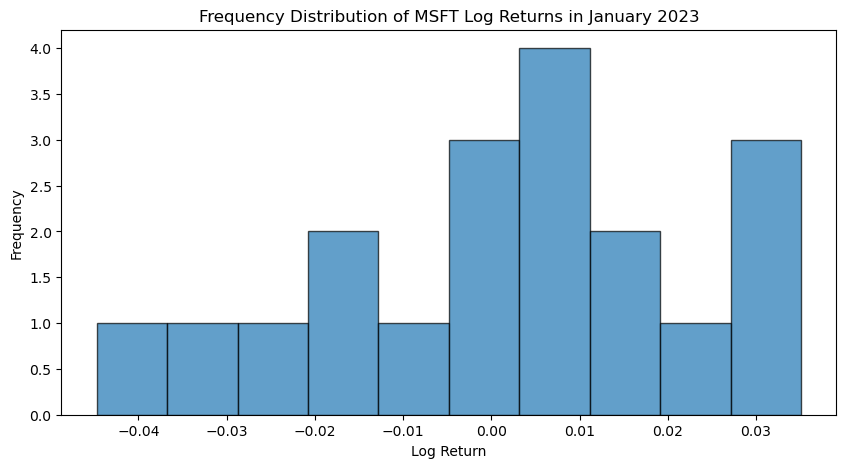

In [17]:
# Setting the figure size for the plot
plt.figure(figsize=(10, 5)) 

# Creating a histogram with 10 bins, black edges for the bins, and 70% transparency for the bars
plt.hist(log_returns, bins=10, edgecolor='k', alpha=0.7)

# Setting the title of the histogram
plt.title(f'Frequency Distribution of {ticker} Log Returns in January 2023')

# Labeling the x-axis as 'Log Return'
plt.xlabel('Log Return')

# Labeling the y-axis as 'Frequency'
plt.ylabel('Frequency')

# Displaying the histogram
plt.show()

## 2.7 Calculating Moving Averages

Moving averages smooth out price data to identify the direction of the trend. Below, we will calculate the 5-day moving average.


A moving average is a statistical method used to smooth out price data by creating a series of averages of different subsets of the full dataset.

- `window_size_5 = 5`: This line sets the window size for the moving average to 5 days.

- `range(len(prices) - window_size_5 + 1)`: This part iterates over the indices of the prices list, but stops window_size_5 - 1 elements before the end to ensure there are enough elements for the 5-day window.

- `prices[i:i + window_size_5]`: This slices the prices list to get a window of 5 prices starting at index i.

- `sum(...)`: Calculates the sum of the prices within the window.

- `/ window_size_5`: Calculates the average by dividing the sum by the window size.

The calculated average is appended to the `moving_avg_5` list.

In [18]:
# Calculating the 5-day moving average
window_size_5 = 5

# Calculating the 5-day moving average by averaging every 5 consecutive prices
moving_avg_5 = [sum(prices[i:i + window_size_5]) / window_size_5 for i in range(len(prices) - window_size_5 + 1)]

In [19]:
# Displaying the 5-day moving averages
moving_avg_5

[228.608,
 226.462,
 227.796,
 231.036,
 233.89600000000002,
 236.542,
 237.93400000000003,
 237.166,
 237.50799999999998,
 238.17800000000003,
 238.516,
 239.47600000000003,
 242.69,
 244.27800000000002,
 244.304,
 245.458]

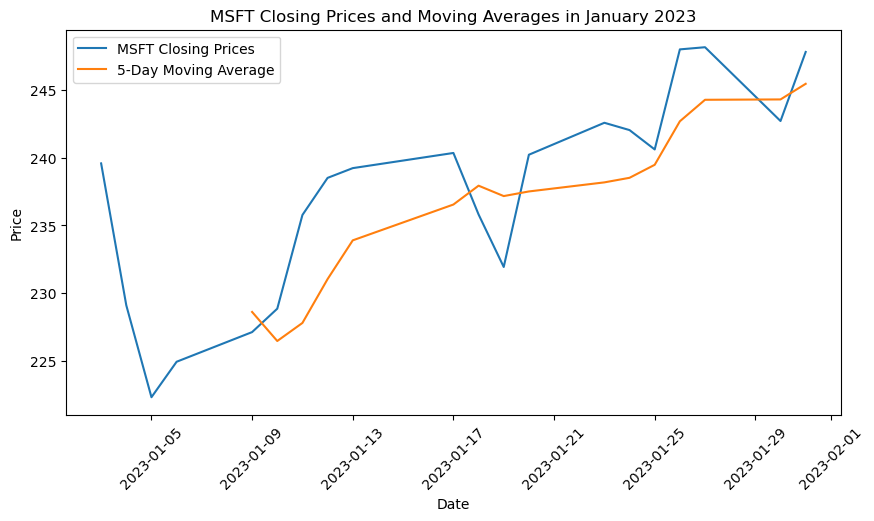

In [20]:
# Plotting the closing prices and moving averages

# Setting the figure size for the plot
plt.figure(figsize=(10, 5))

# Plotting the dates on the x-axis and prices on the y-axis, with a label for the line
plt.plot(dates, prices, label=f'{ticker} Closing Prices')

# Plotting the 5-day moving average, starting from the 5th date to align with the calculated moving averages
plt.plot(dates[window_size_5 - 1:], moving_avg_5, label='5-Day Moving Average')

# Labeling the x-axis as 'Date'
plt.xlabel('Date')

# Labeling the y-axis as 'Price'
plt.ylabel('Price')

# Setting the title of the plot
plt.title(f'{ticker} Closing Prices and Moving Averages in January 2023')

# Displaying the legend for the plot
plt.legend()

# Rotating the x-axis labels by 45 degrees for better readability
plt.xticks(rotation=45)

# Displaying the plot
plt.show()

##  2.8 Summary 

### Summary

In this chapter, we explored the essentials of financial data analysis by retrieving, processing, and analyzing historical stock data. Using Microsoft (MSFT) as the example, we guided you through fundamental techniques for fetching and cleansing financial data, calculating key metrics, and visualizing trends. These foundational skills are essential for making data-driven decisions in finance.